In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans

C = pd.read_csv('Compilation_normalised.csv')

In [2]:
C.columns

Index(['Unnamed: 0', 'lga', 'Median House Price', 'Mean House Price',
       'Normalised Median House Price', 'Normalised Mean House Price',
       'Crime Rate', 'Facility Tally', 'Greenspace Tally', 'Greenspace_area',
       'Response Time', 'School Tally', '(LGA Area)', '(LGA Population)',
       '(Num suburbs)'],
      dtype='object')

In [3]:
C.dtypes

Unnamed: 0                         int64
lga                               object
Median House Price                 int64
Mean House Price                 float64
Normalised Median House Price    float64
Normalised Mean House Price      float64
Crime Rate                       float64
Facility Tally                   float64
Greenspace Tally                 float64
Greenspace_area                  float64
Response Time                    float64
School Tally                     float64
(LGA Area)                       float64
(LGA Population)                   int64
(Num suburbs)                      int64
dtype: object

In [4]:
C['Mean House Price'].describe()

count    7.900000e+01
mean     6.132540e+05
std      4.637045e+05
min      9.890000e+04
25%      2.876667e+05
50%      4.662500e+05
75%      8.477857e+05
max      2.333917e+06
Name: Mean House Price, dtype: float64

In [5]:
from sklearn import metrics as mtr
CR = mtr.normalized_mutual_info_score(C['Crime Rate'], C['Median House Price'])
print(CR)
FT = mtr.normalized_mutual_info_score(C['Facility Tally'], C['Median House Price'])
print(FT)
GT = mtr.normalized_mutual_info_score(C['Greenspace Tally'], C['Median House Price'])
print(GT)
GA = mtr.normalized_mutual_info_score(C['Greenspace_area'], C['Median House Price'])
print(GA)
RT = mtr.normalized_mutual_info_score(C['Response Time'], C['Median House Price'])
print(RT)
ST = mtr.normalized_mutual_info_score(C['School Tally'], C['Median House Price'])
print(ST)

0.9919028123572338
0.969466990039968
0.6410774940915732
0.6447755861424472
0.9857433425019687
0.9072602417922371


In [6]:
from sklearn import metrics as mtr
CR = mtr.mutual_info_score(C['Crime Rate'], C['Median House Price'])
print(CR)
FT = mtr.mutual_info_score(C['Facility Tally'], C['Median House Price'])
print(FT)
GT = mtr.mutual_info_score(C['Greenspace Tally'], C['Median House Price'])
print(GT)
GA = mtr.mutual_info_score(C['Greenspace_area'], C['Median House Price'])
print(GA)
RT = mtr.mutual_info_score(C['Response Time'], C['Median House Price'])
print(RT)
ST = mtr.mutual_info_score(C['School Tally'], C['Median House Price'])
print(ST)

4.299255732916646
4.110528645590976
2.061305679789899
2.078853709677493
4.246611643253866
3.6277862916140733


In [7]:
lgas = []
MedianHP = []
MeanHP = []
CrimeRate = []
FacilityRate = []
GreenspaceTally = []
GreenspaceArea = []
ResponseTime = []
SchoolTally = []
LgaArea = []
LgaPopulation = []

# , MedHP, MeanHP, CR, FR, GT, GA, RT, ST, LGAA, LGAP 

In [8]:
for lga,MedHP in C.groupby("lga"):
    lgas.append(lga)
    MedianHP.append(MedHP)
#     MeanHP.append(MeanHp)
#     CrimeRate.append(CR)
#     FacilityRate.append(FR)
#     GreenspaceTally.append(GT)
#     GreenspaceArea.append(GA)
#     ResponseTime.append(RT)
#     SchoolTally.append(ST)
#     LgaArea.append(LGAA)
#     LgaPopulation.append(LGAP)
    

In [9]:
from sklearn import metrics as mtr
CR = mtr.adjusted_mutual_info_score(C['Crime Rate'], C['Median House Price'])
print(CR)
FT = mtr.adjusted_mutual_info_score(C['Facility Tally'], C['Median House Price'])
print(FT)
GT = mtr.adjusted_mutual_info_score(C['Greenspace Tally'], C['Median House Price'])
print(GT)
GA = mtr.adjusted_mutual_info_score(C['Greenspace_area'], C['Median House Price'])
print(GA)
RT = mtr.adjusted_mutual_info_score(C['Response Time'], C['Median House Price'])
print(RT)
ST = mtr.adjusted_mutual_info_score(C['School Tally'], C['Median House Price'])
print(ST)

2.986234186847449e-12
7.546726822300224e-14
-1.3198718933497828e-13
-1.256310764998402e-13
8.965933151812366e-13
5.628495250299276e-14


In [10]:
# 以下按照corr从高到低排列

In [11]:
# 计算entropy
def entropy(data):
    length = data.size
    ent = 0
    for i in data.value_counts():
        prob = i / length
        ent += prob*-(np.log2(prob))
    return ent

In [12]:
print(entropy(C['Crime Rate']))
print(entropy(C['Facility Tally']))
print(entropy(C['Greenspace Tally']))
print(entropy(C['Greenspace_area']))
print(entropy(C['Response Time']))
print(entropy(C['School Tally']))

6.202514925392294
5.93023929242613
2.973835481989139
2.9991519376853417
6.126565558303686
5.233789292316587


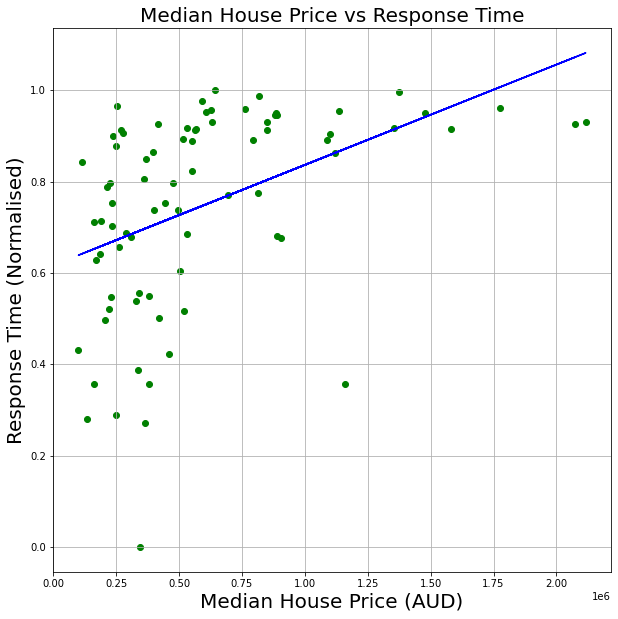

0.4436392663041072

In [13]:
plt.figure(figsize=(10,10))
x = C['Median House Price']
y = C['Response Time']

parameter = np.polyfit(x, y, 1)

p = np.poly1d(parameter)
plt.scatter(x, y, color = 'green')
plt.plot(x, p(x), color = 'blue')

plt.xlabel("Median House Price (AUD)").set_size(20)
plt.ylabel("Response Time (Normalised)").set_size(20)
plt.title("Median House Price vs Response Time").set_size(20)
plt.grid(True)
plt.savefig('HPvsRT.png')
plt.show()

# pearson correlation
abs(x.corr(y))

In [14]:
# import pandas as pd
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
 

# SSE = []  
# for k in range(1,9):
#     estimator = KMeans(n_clusters=k) 
#     estimator.fit(C['Crime Rate'])
#     SSE.append(estimator.inertia_) 
# plt.xlabel('k')
# plt.ylabel('SSE')
# plt.plot(X,SSE,'o-')
# plt.show()

# import numpy as np
# from sklearn.cluster import KMeans

# # Explicitly setting initial points to match those given in Q1 - normally you would not do this for KMeans.
# # It's generally better to let sklearn handle the initialisation and set a fixed random_state if you need reproducability.
# points = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
# initials=np.array([[1],[2]])

# clusters = KMeans(n_clusters=2, init=initials).fit(points)
# print(clusters.cluster_centers_)
# print(clusters.labels_)

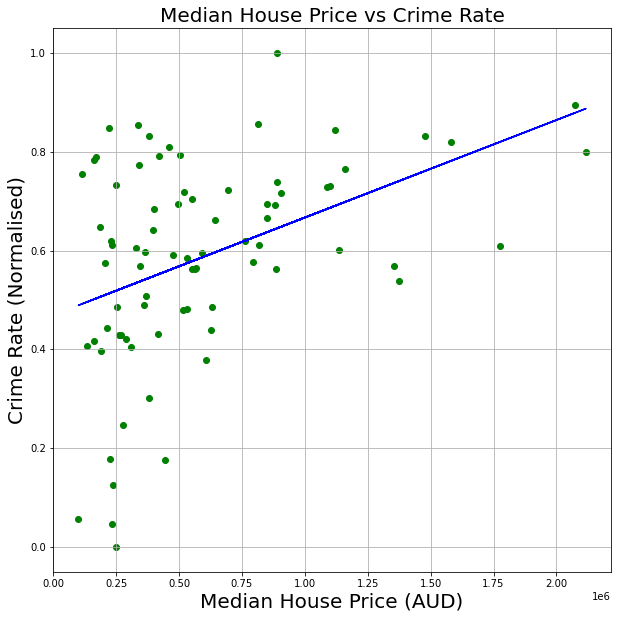

0.4218630935602153

In [15]:
plt.figure(figsize=(10,10))
x = C['Median House Price']
y = C['Crime Rate']

parameter = np.polyfit(x, y, 1)

p = np.poly1d(parameter)
plt.scatter(x, y, color = 'green')
plt.plot(x, p(x), color = 'blue')

plt.xlabel("Median House Price (AUD)").set_size(20)
plt.ylabel("Crime Rate (Normalised)").set_size(20)
plt.title("Median House Price vs Crime Rate").set_size(20)
plt.grid(True)
plt.savefig('HPvsCR.png')
plt.show()

abs(x.corr(y))

In [16]:
# plt.figure(figsize=(10,10))
# x = C['Mean House Price']
# y = C['Greenspace Tally']

# parameter = np.polyfit(x, y, 1)

# p = np.poly1d(parameter)
# plt.scatter(x, y, color = 'green')
# plt.plot(x, p(x), color = 'blue')

# plt.xlabel("Mean House Price")
# plt.ylabel("Greenspace Tally")
# plt.title("Mean House Price vs Greenspace Tally")
# plt.grid(True)

# plt.show()

# abs(x.corr(y))

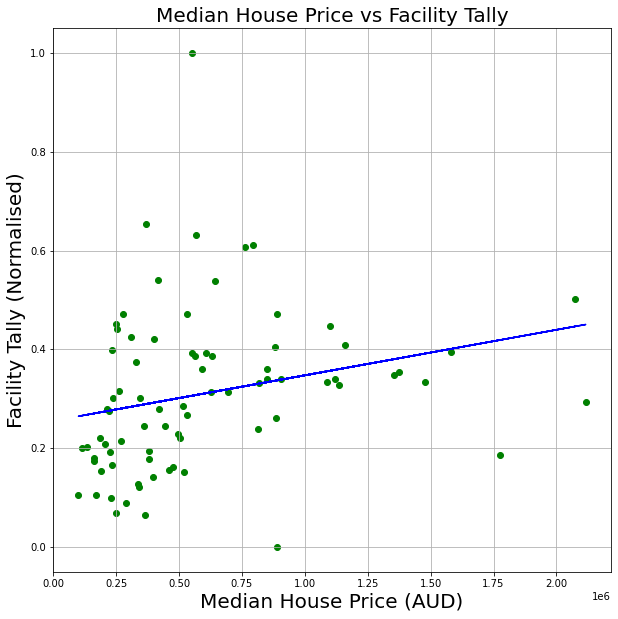

0.2517010183444311

In [17]:
plt.figure(figsize=(10,10))
x = C['Median House Price']
y = C['Facility Tally']

parameter = np.polyfit(x, y, 1)

p = np.poly1d(parameter)
plt.scatter(x, y, color = 'green')
plt.plot(x, p(x), color = 'blue')

plt.xlabel("Median House Price (AUD)").set_size(20)
plt.ylabel("Facility Tally (Normalised)").set_size(20)
plt.title("Median House Price vs Facility Tally").set_size(20)
plt.grid(True)
plt.savefig('HPvsFT.png')
plt.show()

abs(x.corr(y))

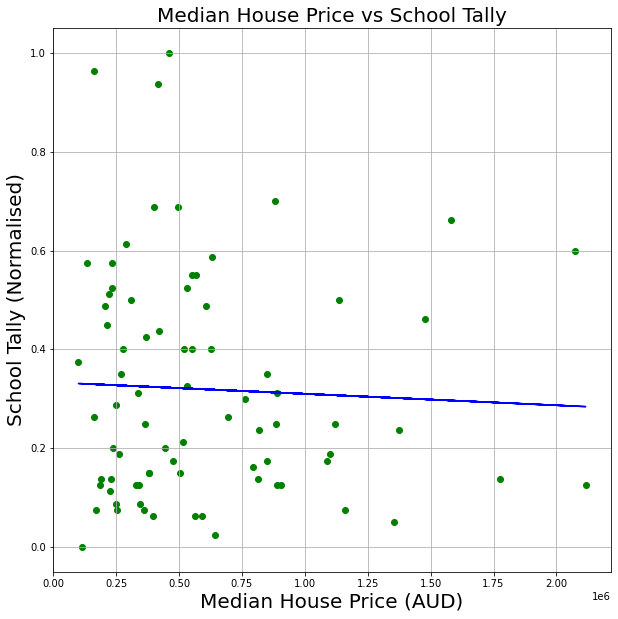

0.04471699265828103

In [18]:
plt.figure(figsize=(10,10))

x = C['Median House Price']
y = C['School Tally']

parameter = np.polyfit(x, y, 1)

p = np.poly1d(parameter)
plt.scatter(x, y, color = 'green')
plt.plot(x, p(x), color = 'blue')

plt.xlabel("Median House Price (AUD)").set_size(20)
plt.ylabel("School Tally (Normalised)").set_size(20)
plt.title("Median House Price vs School Tally").set_size(20)
plt.grid(True)
plt.savefig('HPvsST.png')
plt.show()

abs(x.corr(y))

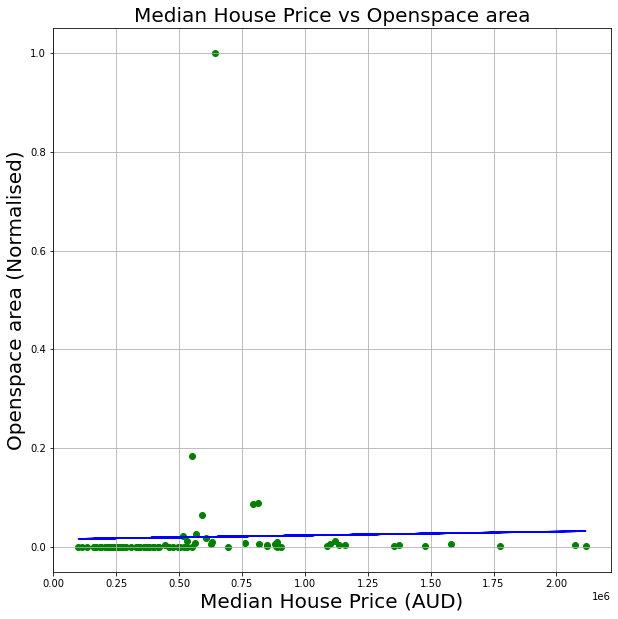

0.029784645593359502

In [19]:
plt.figure(figsize=(10,10))
x = C['Median House Price']
y = C['Greenspace_area']

parameter = np.polyfit(x, y, 1)

p = np.poly1d(parameter)
plt.scatter(x, y, color = 'green')
plt.plot(x, p(x), color = 'blue')

plt.xlabel("Median House Price (AUD)").set_size(20)
plt.ylabel("Openspace area (Normalised)").set_size(20)
plt.title("Median House Price vs Openspace area").set_size(20)
plt.grid(True)
plt.savefig('HPvsOA.png')
plt.show()

abs(x.corr(y))

In [20]:
# plt.rcParams['axes.unicode_minus'] = False

In [21]:

# C['Mean House Price'] = (C['Mean House Price']-C['Mean House Price'].min())/(C['Mean House Price'].max()-C['Mean House Price'].min())
# C['Crime Rate'] = (C['Crime Rate']-C['Crime Rate'].min())/(C['Crime Rate'].max()-C['Crime Rate'].min())
# C['Facility Tally'] = (C['Facility Tally']-C['Facility Tally'].min())/(C['Facility Tally'].max()-C['Facility Tally'].min())
# C['Greenspace Tally'] = (C['Greenspace Tally']-C['Greenspace Tally'].min())/(C['Greenspace Tally'].max()-C['Greenspace Tally'].min())
# C['Greenspace_area'] = (C['Greenspace_area']-C['Greenspace_area'].min())/(C['Greenspace_area'].max()-C['Greenspace_area'].min())
# C['Response Time'] = (C['Response Time']-C['Response Time'].min())/(C['Response Time'].max()-C['Response Time'].min())
# C['School Tally'] = (C['School Tally']-C['School Tally'].min())/(C['School Tally'].max()-C['School Tally'].min())

# C['lga'] = ''

# plt.figure(figsize=(20,10), dpi=80)
# # plt.xticks(rotation=90)
# parallel_coordinates(C[['School Tally','Mean House Price','Response Time','Crime Rate','Greenspace Tally','Facility Tally','lga']],'lga')


